In [105]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import os
import csv

In [106]:
#The path to CSV file
file = "/Users/monicachao/Desktop/DatascienceBootcamp/Project1/Climate-Project-Repo/lajollasealeveltrends.csv"
# Read data into pandas
df = pd.read_csv(file)

In [107]:
#grabbing column names
df.columns

Index(['Year', ' Month', ' Monthly_MSL', ' Unverified', ' Linear_Trend',
       ' High_Conf.', ' Low_Conf.'],
      dtype='object')

In [108]:
#because this csv file has a space before all the header names
renameddf = df.rename(columns={" Monthly_MSL":"MSL1", " Month": "MSL", " Unverified":"Unverified", " Linear_Trend":"Linear Trend",
                       " High_Conf.":"High Conf", " Low_Conf":"Low Conf"})
renameddf

#TEST: renameddf.to_csv("test.csv", encoding="utf-8", index=True)

,Year,MSL,MSL1,Unverified,Linear Trend,High Conf,Low_Conf.
1920,1,NaN,NaN,-0.165,-0.150,-0.180,NaN
1920,2,NaN,NaN,-0.165,-0.150,-0.180,NaN
1920,3,NaN,NaN,-0.165,-0.149,-0.180,NaN
1920,4,NaN,NaN,-0.164,-0.149,-0.179,NaN
1920,5,NaN,NaN,-0.164,-0.149,-0.179,NaN
...,...,...,...,...,...,...,...
2025,8,NaN,NaN,0.064,0.080,0.049,NaN
2025,9,NaN,NaN,0.065,0.081,0.049,NaN
2025,10,NaN,NaN,0.065,0.081,0.049,NaN
2025,11,NaN,NaN,0.065,0.081,0.049,NaN


In [109]:
#grabbing only year and mean sea level rise/fall for graphing

fixeddf = renameddf.rename(columns={"Year":"Month"})
fixeddf

#TEST: fixeddf.to_csv("test.csv", encoding="utf-8", index=True)

,Month,MSL,MSL1,Unverified,Linear Trend,High Conf,Low_Conf.
1920,1,NaN,NaN,-0.165,-0.150,-0.180,NaN
1920,2,NaN,NaN,-0.165,-0.150,-0.180,NaN
1920,3,NaN,NaN,-0.165,-0.149,-0.180,NaN
1920,4,NaN,NaN,-0.164,-0.149,-0.179,NaN
1920,5,NaN,NaN,-0.164,-0.149,-0.179,NaN
...,...,...,...,...,...,...,...
2025,8,NaN,NaN,0.064,0.080,0.049,NaN
2025,9,NaN,NaN,0.065,0.081,0.049,NaN
2025,10,NaN,NaN,0.065,0.081,0.049,NaN
2025,11,NaN,NaN,0.065,0.081,0.049,NaN


In [110]:
newdf = fixeddf[["MSL"]]
newdf
#TEST newdf.to_csv("test.csv", encoding="utf-8", index=True)

,MSL
1920,NaN
1920,NaN
1920,NaN
1920,NaN
1920,NaN
...,...
2025,NaN
2025,NaN
2025,NaN
2025,NaN


In [111]:
#drops any row with N/A in it
droppeddf=newdf.dropna(how='any')
droppeddf

#resetting index
new = droppeddf.reset_index()
new

,index,MSL
0,1924,-0.225
1,1924,-0.195
2,1925,-0.198
3,1925,-0.207
4,1925,-0.150
...,...,...
1114,2019,0.031
1115,2019,0.006
1116,2019,-0.008
1117,2019,0.036


In [112]:
#renaming the original index to years
new = new.rename(columns={"index":"Year"})
new

,Year,MSL
0,1924,-0.225
1,1924,-0.195
2,1925,-0.198
3,1925,-0.207
4,1925,-0.150
...,...,...
1114,2019,0.031
1115,2019,0.006
1116,2019,-0.008
1117,2019,0.036


In [113]:
#Grabbing means from each year of the sea level rise/fall
new.groupby("Year").mean().reset_index()

#saving the cleaned data as a csv
new.to_csv("cleaneddata.csv", encoding="utf-8", index=True)

In [114]:
#Graphing, setting x-axis, setting up linear regression, etc...
x_axis = new["Year"]
MSL = new["MSL"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x_axis, MSL)
print("R-squared: %f" % r_value**2)

R-squared: 0.613262


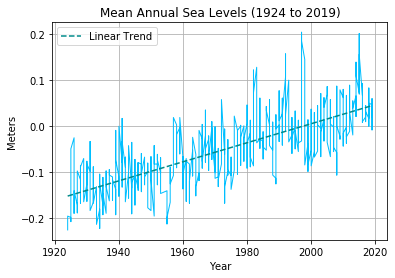

In [131]:
#1924 to 2019

#plotting a line graph with a width of 1
plt.plot(x_axis, MSL, linewidth = 1, color = "deepskyblue")
plt.plot(x_axis, intercept + slope*x_axis, '--', color = 'darkcyan', label='Linear Trend')

#labeling axis, title, adding grid
plt.legend()
plt.title("Mean Annual Sea Levels (1924 to 2019)")
plt.xlabel("Year")
plt.ylabel("Meters")
plt.grid()


#saves image
plt.savefig("/Users/monicachao/Desktop/DatascienceBootcamp/Project1/Climate-Project-Repo/SeaLevelTrends.png")
plt.show()

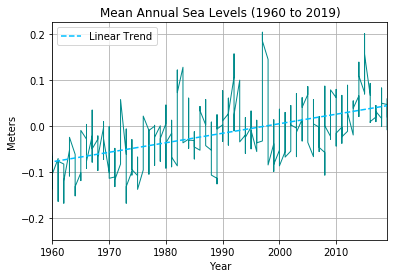

In [132]:
#narrowing it to 1960 to 2019

#plotting a line graph with a width of 1
plt.plot(x_axis, MSL, linewidth = 1, color = "darkcyan")
plt.plot(x_axis, intercept + slope*x_axis, '--', color = 'deepskyblue', label='Linear Trend')

#labeling axis, title, adding grid
plt.legend()
plt.title("Mean Annual Sea Levels (1960 to 2019)")
plt.xlabel("Year")
plt.ylabel("Meters")
plt.grid()
plt.xlim((1960,2019))


plt.savefig("/Users/monicachao/Desktop/DatascienceBootcamp/Project1/Climate-Project-Repo/SeaLevelTrends1960to2019.png")
plt.show()

In [123]:
# T test
true_mu = 0

onesample_results = stats.ttest_1samp(MSL, true_mu)

print(onesample_results)

Ttest_1sampResult(statistic=-23.97171722440473, pvalue=8.362739146373659e-103)


R-squared: 0.004486


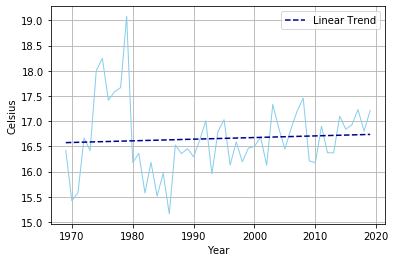

In [134]:
#weather data merge

weather = pd.read_csv('Yearly_temperature_data.csv')


x_axis_weather = weather["Year"]
mean_temp = weather["Mean Temp (C)"]
plt.plot(x_axis_weather, mean_temp, linewidth = 1, color = "skyblue")

slopew, interceptw, r_valuew, p_valuew, std_errw = stats.linregress(x_axis_weather, mean_temp)
print("R-squared: %f" % r_valuew**2)
plt.plot(x_axis_weather, interceptw + slopew*x_axis_weather, '--', color = 'darkblue', label='Linear Trend')

plt.legend()
plt.xlabel("Year")
plt.ylabel("Celsius")
plt.grid()

In [133]:

onesample_resultsw = stats.ttest_1samp(mean_temp, true_mu)

print(onesample_resultsw)

Ttest_1sampResult(statistic=164.17725061773749, pvalue=5.484664954644351e-70)


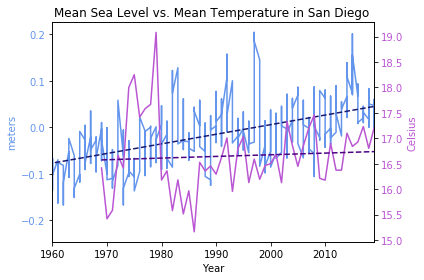

<Figure size 432x288 with 0 Axes>

In [154]:
fig, ax1 = plt.subplots()
plt.xlim((1960,2019))
plt.title("Mean Sea Level vs. Mean Temperature in San Diego ")

ax1.set_xlabel('Year')
ax1.set_ylabel('meters', color="cornflowerblue")
ax1.plot(x_axis, MSL, color="cornflowerblue")
ax1.tick_params(axis='y', labelcolor="cornflowerblue")
plt.plot(x_axis, intercept + slope*x_axis, '--', color = 'midnightblue', label='Linear Trend')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Celsius', color="mediumorchid")  # we already handled the x-label with ax1
ax2.plot(x_axis_weather, mean_temp, color="mediumorchid")
ax2.tick_params(axis='y', labelcolor="mediumorchid")
plt.plot(x_axis_weather, interceptw + slopew*x_axis_weather, '--', color = 'indigo', label='Linear Trend')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()



plt.savefig("/Users/monicachao/Desktop/DatascienceBootcamp/Project1/Climate-Project-Repo/MSLvsTemp.png")
